In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import random

In [39]:
random.seed(1234)
np.random.seed(1234)

In [46]:
X = pd.read_csv('../Notebooks/primary-screen-replicate-collapsed-logfold-change.csv', index_col=0)

# remove cells *_FAILED_STR
failed = [f for f in X.index if 'FAILED_STR' in f]
X.drop(failed, inplace = True)
X.shape

good_cols = []
bad = 5

na_columns = X.isna().sum(axis = 0) # number of nan per column

for i, v in enumerate(na_columns):
    if v < bad: good_cols.append(i)
        
x = X[X.columns[good_cols]].dropna(axis=0).to_numpy()
x.shape

(560, 572)

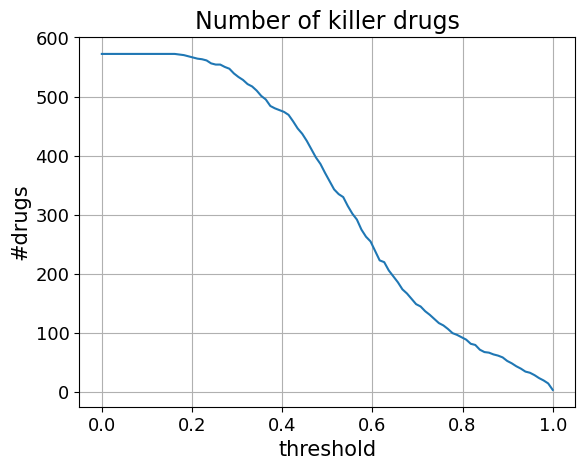

In [41]:
percentage = np.linspace(0, 1, 100)

nkill = []

for p in percentage:
    killers = []
    killers = np.sum(np.sign(x) == -1, axis = 0) >= x.shape[0]*p
    killers = [d for d in range(x.shape[1]) if killers[d]]
    nkill.append(len(killers))

plt.tick_params(axis='both', which='major', labelsize=13)
plt.plot(percentage, nkill)
plt.xlabel('threshold', fontsize=15)
plt.ylabel('#drugs', fontsize = 15)
plt.title('Number of killer drugs', fontsize = 17)
plt.grid()
plt.show()

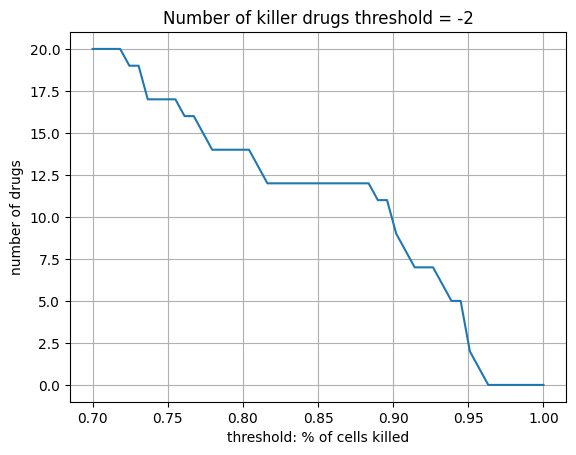

In [19]:
percentage = np.linspace(0.7, 1, 50)

nkill = []

for p in percentage:
    killers = []
    killers = np.sum(x < -2, axis = 0) >= x.shape[0]*p
    killers = [d for d in range(x.shape[1]) if killers[d]]
    nkill.append(len(killers))
    
plt.plot(percentage, nkill)
plt.xlabel('threshold: % of cells killed')
plt.ylabel('number of drugs')
plt.title('Number of killer drugs threshold = -2')
plt.grid()
plt.show()

# w/ killer drugs

In [23]:
import sys
sys.path.append('../')

In [24]:
from load_data import *

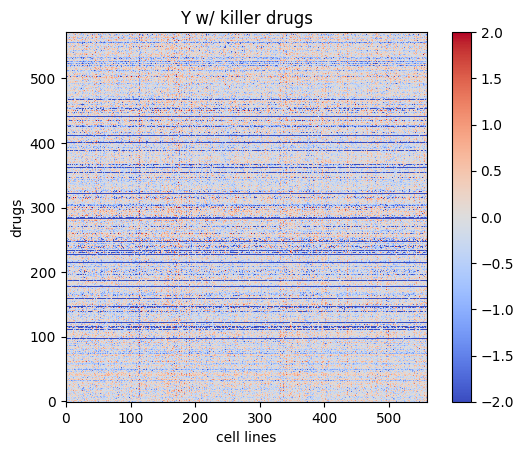

In [43]:

#x = load_matrix(1234)
plt.imshow(x.T, cmap='coolwarm', interpolation='none', origin = 'lower', norm=colors.CenteredNorm(halfrange=2.0))
plt.colorbar()
plt.title('Y w/ killer drugs')
plt.xlabel('cell lines')
plt.ylabel('drugs')
plt.show()

In [16]:
n = min(x.shape[0], x.shape[1])
n

481

# w/o killer drugs

In [28]:
# drugs that kill more than 80% of cells
killers = []
killers = np.sum(np.sign(x) == -1, axis = 0) >= x.shape[0]*0.8
killers = [d for d in range(x.shape[1]) if killers[d]]

xk = np.delete(x, killers, 1)

In [47]:
random.seed(1234)
np.random.seed(1234)
perm_rows = np.random.permutation(x.shape[0])
perm_cols = np.random.permutation(x.shape[1])

x = x[perm_rows, :]
x = x[:, perm_cols]

killer_threshold = 0.8

# delete drugs that kill more than "killer_threshold"% of cells
if killer_threshold != 1:
    killers = []
    killers = np.sum(np.sign(x) == -1, axis = 0) >= x.shape[0]*killer_threshold 
    killers = [d for d in range(x.shape[1]) if killers[d]]

    xk = np.delete(x, killers, 1)

n = np.min(xk.shape)

#x = x[:n, :n] # to have a square matrix
x = x.T 

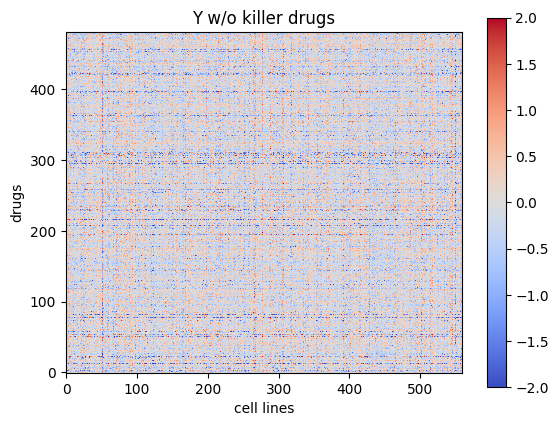

In [50]:
#xk = load_matrix(1234, 0.8)
plt.imshow(xk.T, cmap='coolwarm', interpolation='none', origin = 'lower', norm=colors.CenteredNorm(halfrange=2.0))
plt.colorbar()
plt.title('Y w/o killer drugs')
plt.xlabel('cell lines')
plt.ylabel('drugs')
plt.show()